# Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# 1A) EDA

In [2]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [3]:
# Create a LabelEncoder object
le_month = LabelEncoder()
le_day = LabelEncoder()

# Apply LabelEncoder to 'month' and 'day' columns
data['month_encoded'] = le_month.fit_transform(data['month'])
data['day_encoded'] = le_day.fit_transform(data['day'])

# Check the encoded columns
print(data[['month', 'month_encoded', 'day', 'day_encoded']].head())

  month  month_encoded  day  day_encoded
0   mar              7  fri            0
1   oct              9  tue            5
2   oct              9  sat            2
3   mar              7  fri            0
4   mar              7  sun            3


In [4]:
data.describe() #observing basic statistics of the data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,4.660194,4.295146,90.664272,110.925437,548.626019,9.039417,18.888738,44.330097,4.015728,0.021748,12.536485,5.398058,2.726214
std,2.312853,1.220080,5.508720,63.895656,247.753859,4.554604,5.800546,16.334531,1.794882,0.296531,63.318585,3.951407,1.920804
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,69.150000,439.300000,6.500000,15.550000,33.000000,2.700000,0.000000,0.000000,1.000000,1.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,6.000000,3.000000
75%,7.000000,5.000000,92.900000,141.850000,713.900000,10.900000,22.800000,53.000000,4.900000,0.000000,6.555000,10.000000,4.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,10.000000,6.000000


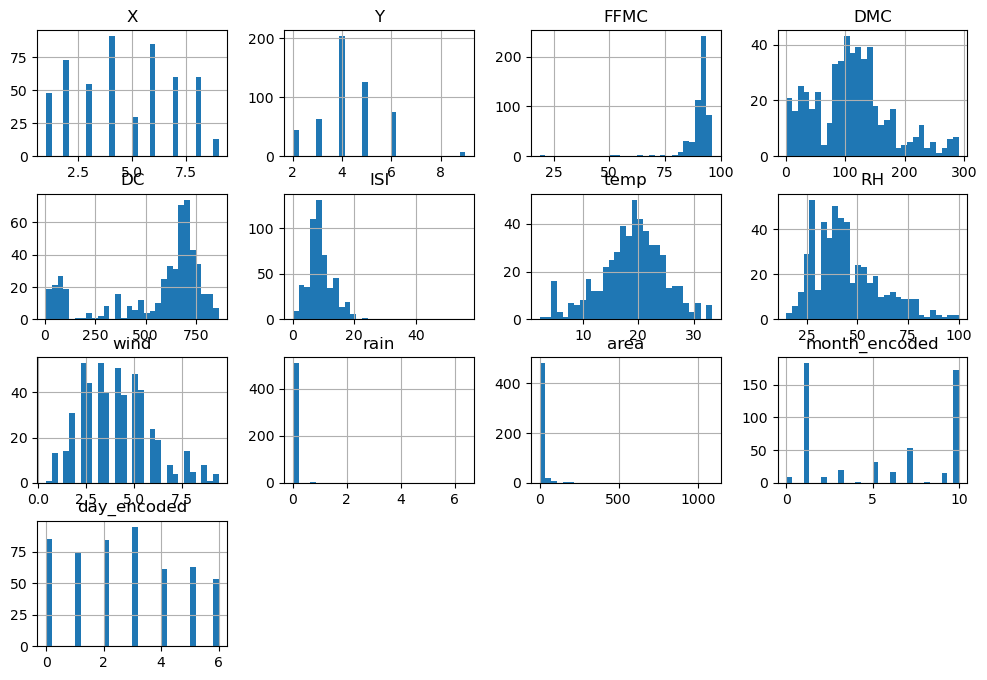

In [5]:
data.hist(bins=30, figsize=(12, 8)) #viewing the actual distributions of the data
plt.show()

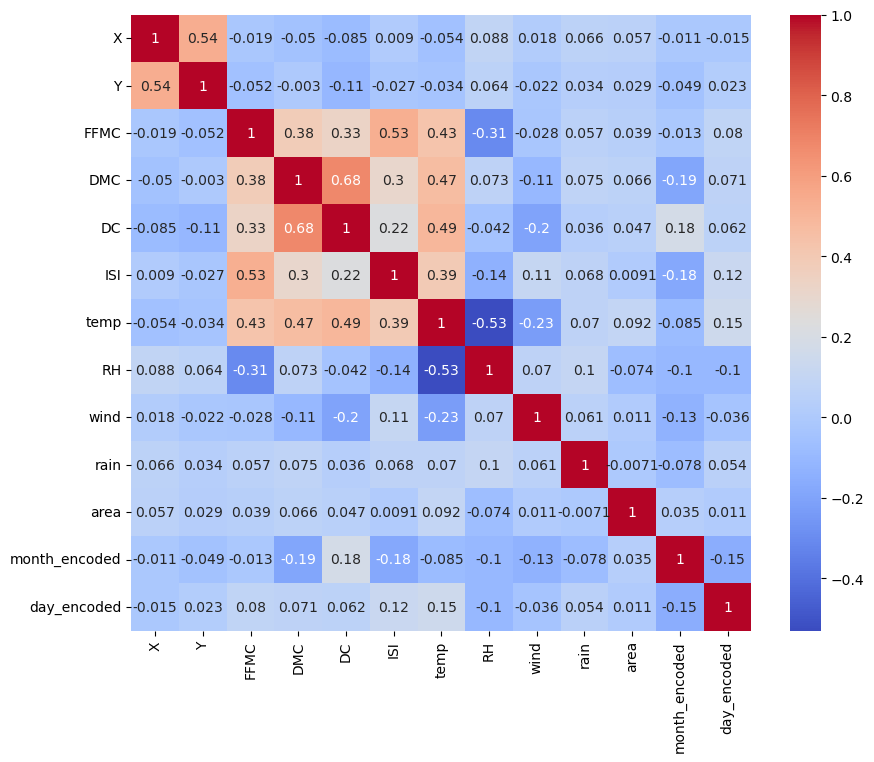

In [6]:
# Correlation matrix to understand correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 1B) Log Tranformation of Area

In [7]:
data['log_area'] = np.log(data['area'] + 1)

# 1C) Simple regression model


Predictor: X
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.572
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.210
Time:                        00:21:27   Log-Likelihood:                -898.48
No. Observations:                 515   AIC:                             1801.
Df Residuals:                     513   BIC:                             1809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9505      0.138      

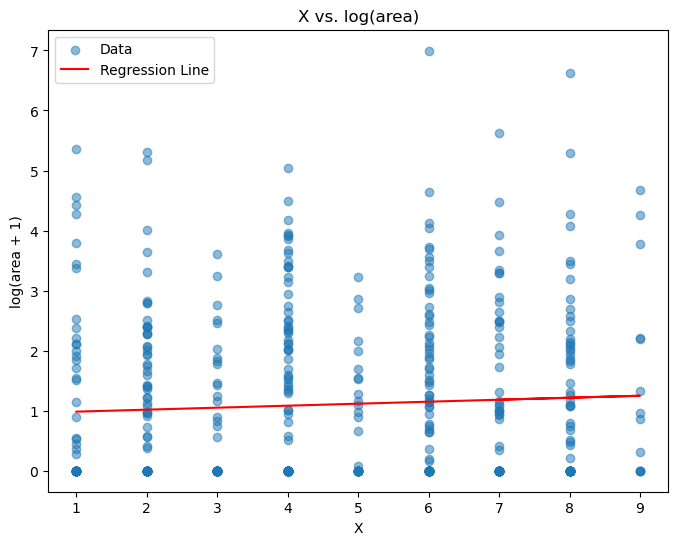


Predictor: Y
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2138
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.644
Time:                        00:21:27   Log-Likelihood:                -899.16
No. Observations:                 515   AIC:                             1802.
Df Residuals:                     513   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0054      0.224      

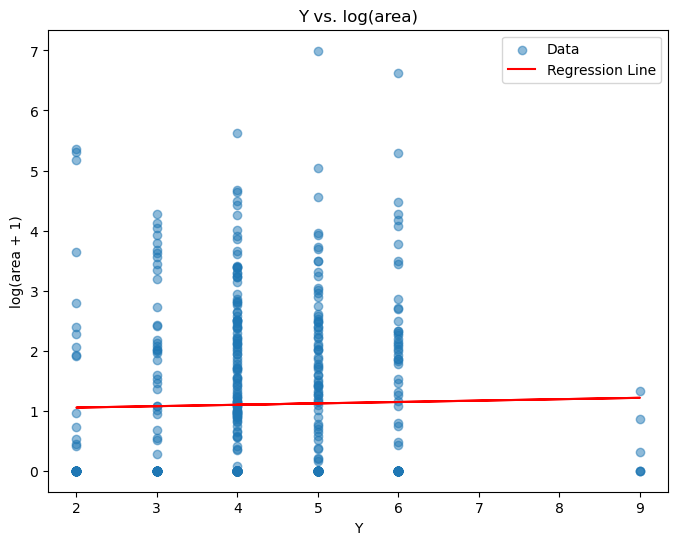


Predictor: month_encoded
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9786
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.323
Time:                        00:21:27   Log-Likelihood:                -898.78
No. Observations:                 515   AIC:                             1802.
Df Residuals:                     513   BIC:                             1810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.

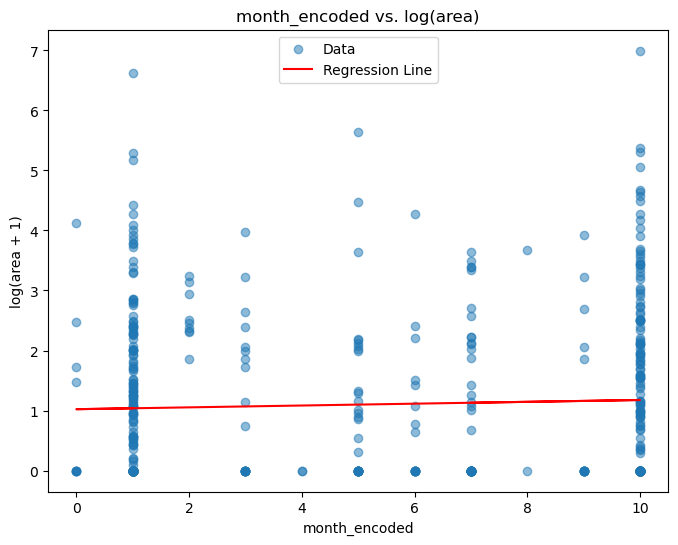


Predictor: day_encoded
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2307
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.631
Time:                        00:21:28   Log-Likelihood:                -899.15
No. Observations:                 515   AIC:                             1802.
Df Residuals:                     513   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0634    

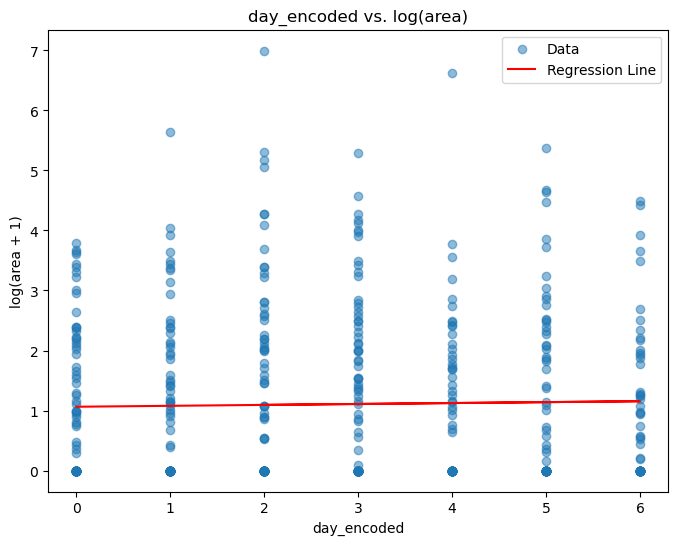


Predictor: FFMC
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9581
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.328
Time:                        00:21:28   Log-Likelihood:                -898.79
No. Observations:                 515   AIC:                             1802.
Df Residuals:                     513   BIC:                             1810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1185      1.010   

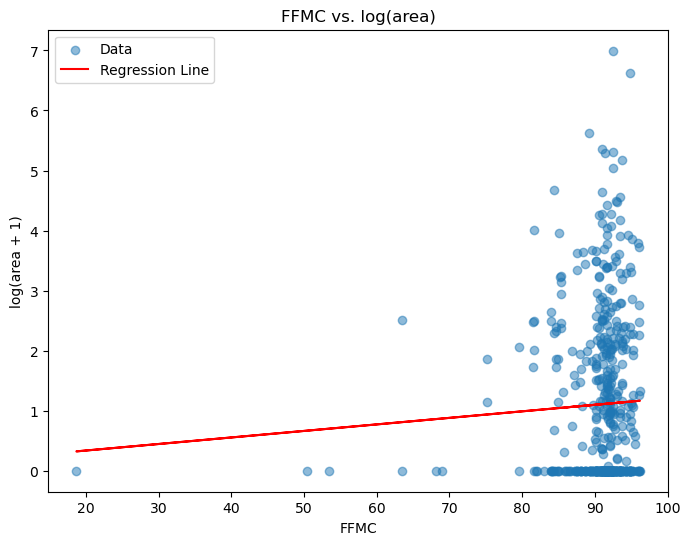


Predictor: DMC
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.741
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.188
Time:                        00:21:28   Log-Likelihood:                -898.40
No. Observations:                 515   AIC:                             1801.
Df Residuals:                     513   BIC:                             1809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9650      0.123    

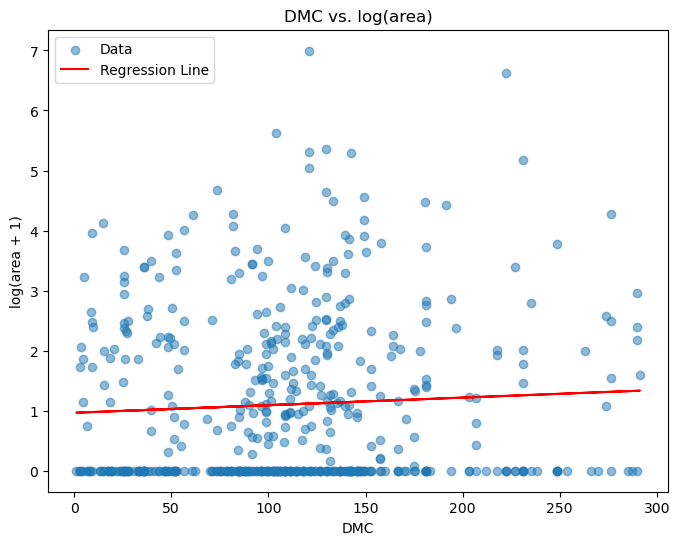


Predictor: DC
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.003
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.158
Time:                        00:21:28   Log-Likelihood:                -898.27
No. Observations:                 515   AIC:                             1801.
Df Residuals:                     513   BIC:                             1809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9134      0.149     

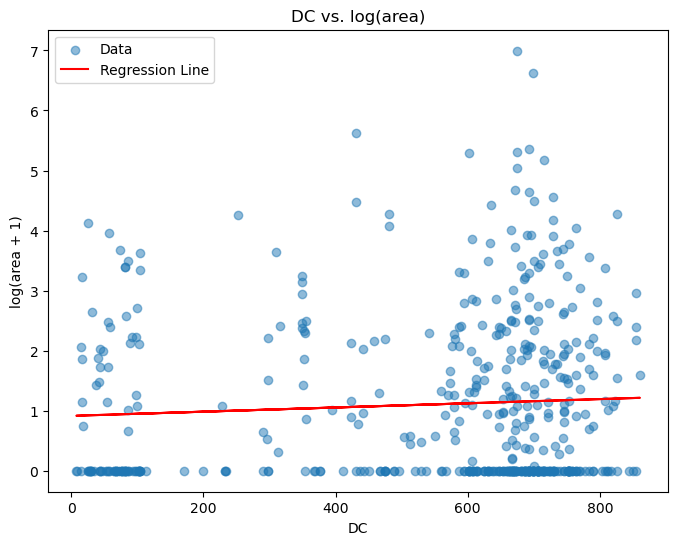


Predictor: ISI
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06923
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.793
Time:                        00:21:28   Log-Likelihood:                -899.23
No. Observations:                 515   AIC:                             1802.
Df Residuals:                     513   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1372      0.136    

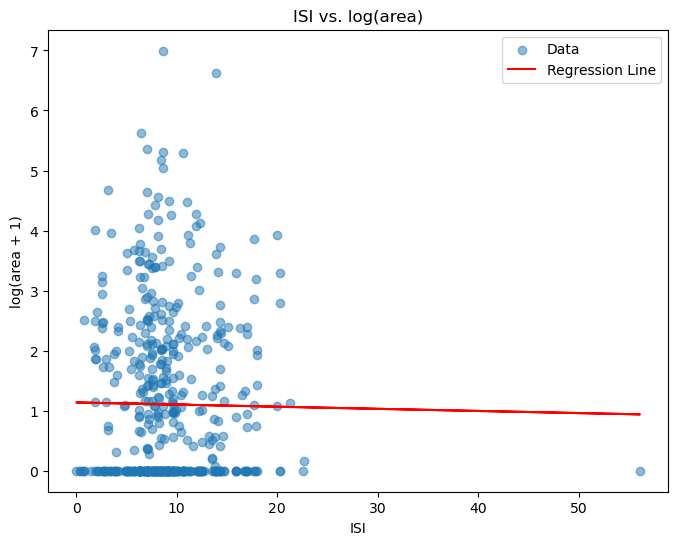


Predictor: temp
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.039
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.309
Time:                        00:21:29   Log-Likelihood:                -898.75
No. Observations:                 515   AIC:                             1801.
Df Residuals:                     513   BIC:                             1810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9019      0.209   

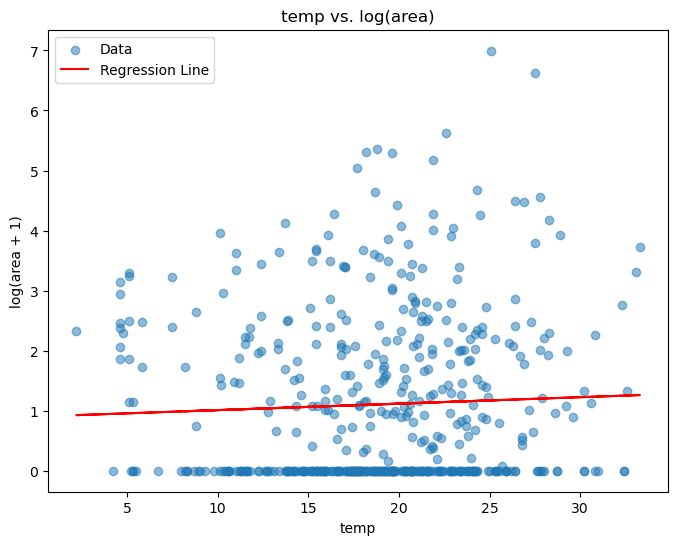


Predictor: RH
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.419
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.234
Time:                        00:21:29   Log-Likelihood:                -898.56
No. Observations:                 515   AIC:                             1801.
Df Residuals:                     513   BIC:                             1810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3031      0.177     

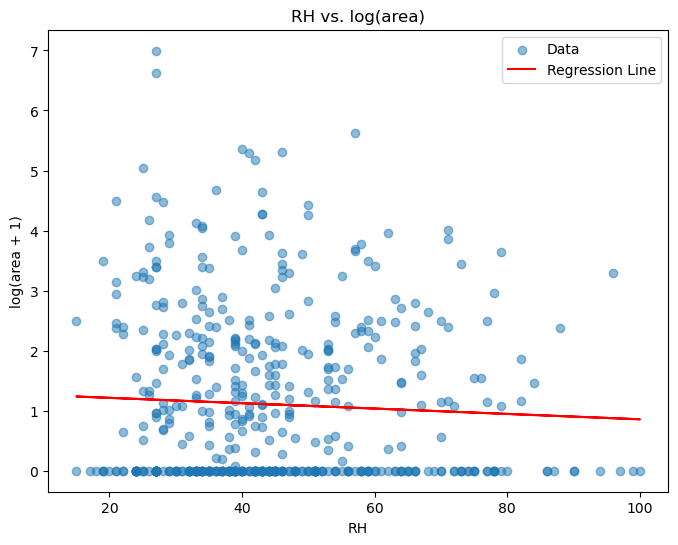


Predictor: wind
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.276
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.132
Time:                        00:21:29   Log-Likelihood:                -898.13
No. Observations:                 515   AIC:                             1800.
Df Residuals:                     513   BIC:                             1809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8987      0.150   

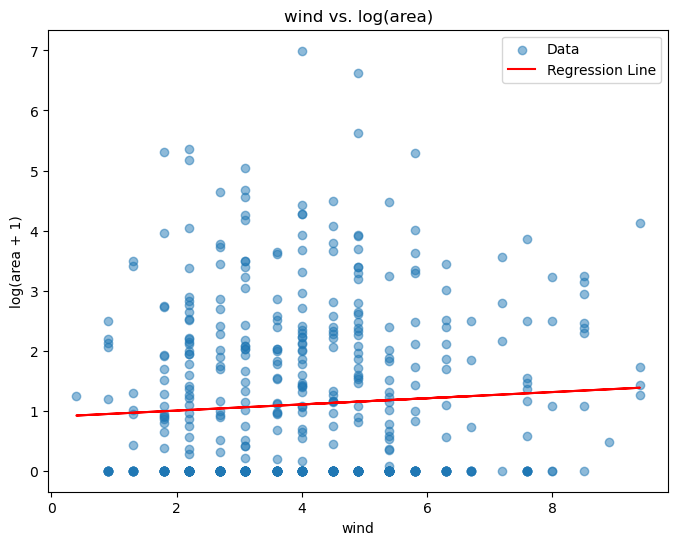


Predictor: rain
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2916
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.589
Time:                        00:21:29   Log-Likelihood:                -899.12
No. Observations:                 515   AIC:                             1802.
Df Residuals:                     513   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1028      0.061   

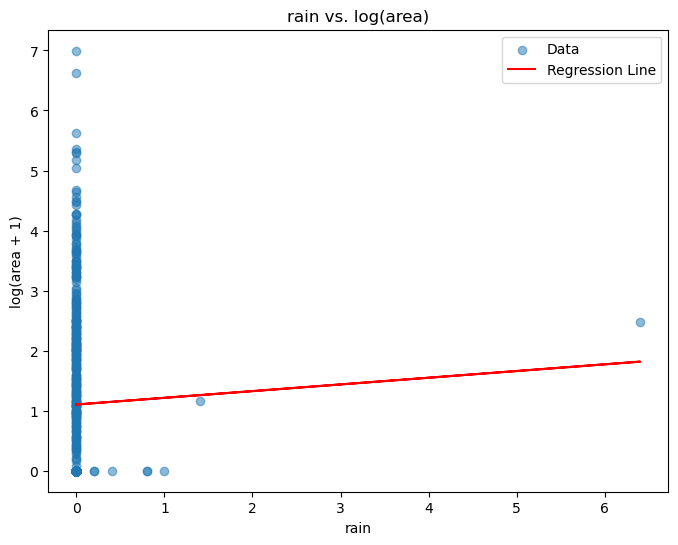

In [8]:
import statsmodels.api as sm

# List of predictors (excluding the response variables)
predictors = ['X', 'Y', 'month_encoded','day_encoded','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Function to fit a simple linear regression model
def fit_simple_linear_regression(predictor):
    X = data[[predictor]]
    X = sm.add_constant(X)  # Adds the intercept term
    y = data['log_area']
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Print summary
    print(f"\nPredictor: {predictor}")
    print(model.summary())
    
    # Plot the regression
    plt.figure(figsize=(8, 6))
    plt.scatter(data[predictor], y, alpha=0.5, label='Data')
    plt.plot(data[predictor], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(predictor)
    plt.ylabel('log(area + 1)')
    plt.title(f'{predictor} vs. log(area)')
    plt.legend()
    plt.show()

# Fit the model for each predictor
for predictor in predictors:
    fit_simple_linear_regression(predictor)

# 1D) Multi-Linear Regression Model

In [9]:
# Select predictors for the multiple regression
X = data[predictors]
X = sm.add_constant(X)  # Adds intercept
y = data['log_area']

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary of the multiple regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.078
Date:                Sun, 15 Sep 2024   Prob (F-statistic):              0.377
Time:                        00:21:30   Log-Likelihood:                -892.72
No. Observations:                 515   AIC:                             1811.
Df Residuals:                     502   BIC:                             1867.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      1.387      0.071

# 1E) Build a Model

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          feature         VIF
0           const  514.833711
1               X    1.434244
2               Y    1.446188
3   month_encoded    1.414296
4     day_encoded    1.059676
5            FFMC    1.705581
6             DMC    2.673031
7              DC    2.639714
8             ISI    1.603768
9            temp    2.747642
10             RH    1.962064
11           wind    1.156517
12           rain    1.051225


In [11]:
# Define the predictor variables and the response variable (log of the burned area)
y = data['log_area']
X = data[['X', 'month_encoded', 'DMC', 'ISI', 'wind']]


# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the multiple regression model
print("\nMultiple Regression Model Summary:")
print(model.summary())


Multiple Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.876
Date:                Sun, 15 Sep 2024   Prob (F-statistic):             0.0968
Time:                        00:21:30   Log-Likelihood:                -894.57
No. Observations:                 515   AIC:                             1801.
Df Residuals:                     509   BIC:                             1827.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const     

# 1F)


In [12]:
# Extract coefficients from the OLS model
coefficients = model.params
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
const            0.412443
X                0.035746
month_encoded    0.023700
DMC              0.002067
ISI             -0.011740
wind             0.068493
dtype: float64


# 1G)

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assume the final model is already fitted and available as `model`

# Sample means for quantitative predictors
means = {
    'X': data['X'].mean(),
    'DMC': data['DMC'].mean(),
    'ISI': data['ISI'].mean(),
    'wind': data['wind'].mean()
}

# Most frequent category for the qualitative predictor
most_frequent_month = data['month_encoded'].mode()[0]

# Create DataFrame for new data
new_data = pd.DataFrame({
    'const': [1],  # This is for the intercept
    'X': [means['X']],
    'month_encoded': [most_frequent_month],
    'DMC': [means['DMC']],
    'ISI': [means['ISI']],
    'wind': [means['wind']]
})

# Predict using the final model
predicted_log_area = model.predict(new_data)

# Convert the predicted log area back to the original scale
predicted_area = np.exp(predicted_log_area)
print(f"Predicted burned area (in hectares): {predicted_area[0]}")

Predicted burned area (in hectares): 2.720864507333334


# 1H)

In [14]:
import statsmodels.api as sm

# Calculate influence measures
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Identify influential points (outliers) based on Cook's Distance
influential_points = np.where(cooks_d > 4 / len(data))[0]
print("Influential points (indices):", influential_points)

# Remove influential points
data_clean = data.drop(index=influential_points)

# Redefine predictor and response variables
X_clean = data_clean[['X', 'month_encoded', 'DMC', 'ISI', 'wind']]
X_clean = sm.add_constant(X_clean)
y_clean = data_clean['log_area']

# Fit the model without outliers
model_clean = sm.OLS(y_clean, X_clean).fit()

# Print the summary of the model without outliers
print("\nMultiple Regression Model Without Outliers Summary:")
print(model_clean.summary())

Influential points (indices): [ 22 227 229 231 233 235 236 237 238 281 369 377 383 392 395 415 456 468
 472 478 487 503 512]

Multiple Regression Model Without Outliers Summary:
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.027
Date:                Sun, 15 Sep 2024   Prob (F-statistic):             0.0735
Time:                        00:21:30   Log-Likelihood:                -777.87
No. Observations:                 492   AIC:                             1568.
Df Residuals:                     486   BIC:                             1593.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std 